$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



Write your answer here:



Here, $A =
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix},
b = \begin{bmatrix}
-10\\
2
\end{bmatrix}, c = 104$



$\therefore f(\mathbf{x}) =  \mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c =\mathbf{x}^\top \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}\mathbf{x} + 2\begin{bmatrix}
-10\\
2
\end{bmatrix}^\top \mathbf{x} + 104$


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

Write your answer here:


Let 
\begin{align}
g(\alpha) &= f(x - \alpha \nabla f(x)) \\
\Rightarrow g'(\alpha) &= (-\nabla f(x)^\top )(\nabla f(x - \alpha \nabla f(x))) \\
          &= (-\nabla f(x)^\top )(2 A(x - \alpha \nabla f(x)) + 2b) \\
          &= -2(\nabla f(x)^\top A x - \alpha \nabla f(x)^\top A \nabla f(x) + \nabla f(x)^\top b) \\
\end{align}
To find minima,  $g'(\alpha) = 0$
\begin{align}
\Rightarrow \alpha \nabla f(x)^\top A \nabla f(x) &= \nabla f(x)^\top (A + 2b)\\
\Rightarrow \alpha \nabla f(x)^\top A \nabla f(x) &= \frac{\nabla f(x)^\top \nabla f(x)}{2} \\
\Rightarrow \alpha &= \frac{\nabla f(x)^\top \nabla f(x)}{2\nabla f(x)^\top A \nabla f(x)} 
\end{align}

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [29]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [30]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [31]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

$\textbf{Question 3}: $


In [32]:
#Complete the module to compute the steplength
def compute_steplength(x): #add appropriate arguments to the function 
  #Complete the code 
  A = np.identity(2)
  g = evalg(x)
  g_t = np.matrix.transpose(g)
  step_length = np.matmul(g_t, g)/(2*np.matmul(np.matmul(g_t, A), g))
  return step_length

In [33]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k, evalf(x)


In [34]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

(array([-100.,   25.]), 1, 0.0)

$\textbf{Question 4}: $

With the starting point $x^0 = (10, 10)$ and the new module to compute $\eta ^k$, we try $ \eta = 10^{-p}$, where $p = 1, 2,\cdots, 10.$
For each $\eta$ , we record the number of iterations taken by the algorithm to terminate.


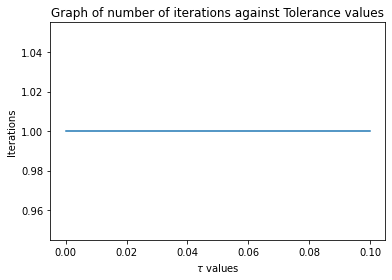

In [35]:
my_start_x = np.array([10,10])
iterations_counter = []
tolerance_array = []
for i in range(1,11):
  my_tol= 10**-i
  x, k, f_v = find_minimizer(my_start_x, my_tol)
  iterations_counter.append(k)
  tolerance_array.append(10**-i)
import matplotlib.pyplot as plt
plt.plot(tolerance_array, iterations_counter)
plt.title("Graph of number of iterations against Tolerance values")
plt.xlabel(r'$\tau$ values')
plt.ylabel('Iterations')
plt.show()

$f(\mathbf{x})$ is a convex and quadratic function. Here in this exersize, we are using the exact line search because of that algorithm is directly converging to final minimizer within one loop. In the last exersize, we computed number of iterations for different step sizes, the ideal value of the step leangth was $0.5$ among the given values.

Here plot is constant function where in the previous exersize we got different functions, we got more iterations to converge because of the fixed change in the step leangth. Here we use step length by finding the value of $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$. Since quaratic functions converges within one step if we use exact line search, algorithm is converging within one step irrespective of the initial point which was not the case in the last exersize.